In [49]:
import numpy as np
from scipy.special import softmax
def mean_field_clustering(S, K, sol, cus=False, ns=0, iter=500):
    N = S.shape[0]

    beta = 3

    K = len(np.unique(sol))
    h = np.zeros((N, K))

    for k in range(K):
        cluster_indices = np.where(sol == k)[0]
        for i in range(N):
            h[i, k] = S[i, cluster_indices].sum()

    if cus:
        h = np.random.rand(N, K)
    else:
        h += np.random.rand(N, K) * ns

    q = softmax(beta*h, axis=1)


    for iteration in range(iter):
        h = -S.dot(q)
        q_new = softmax(beta*-h, axis=1)
        
        # Check for convergence
        diff = np.linalg.norm(q_new - q)
        #print(diff)
        if diff < 1e-10:
            print(f'Converged after {iteration} iterations')
            break

        q = q_new

    return np.argmax(q, axis=1), q, h

In [45]:
# Required Libraries
from sklearn.datasets import make_classification
from sklearn.metrics import adjusted_rand_score
import numpy as np
from rac.correlation_clustering import max_correlation, fast_max_correlation, max_correlation_dynamic_K

# Generate synthetic data
K = 20
X, y = make_classification(n_samples=1000, n_classes=K, n_features=10, n_informative=10, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create the similarity matrix S ensuring it is symmetric and zeros on the diagonal
n = len(y)
S = np.zeros((n, n))
for i in range(n):
    for j in range(i, n):  # Fill only upper triangle first
        if i == j:
            S[i, j] = 0
        else:
            S[i, j] = S[j, i] = 1 if y[i] == y[j] else -1


#np.random.seed(42)
upper_indices = np.triu_indices(n, k=1)  # Ignore diagonal
num_upper_elements = len(upper_indices[0])

# Define proportions r and p
r = 0.8  # Proportion of zeros
p = 0.52  # Proportion of remaining elements to make noisy

# Select indices for zeroing out
mask_zero = np.random.choice(range(num_upper_elements), size=int(r*num_upper_elements), replace=False)
S[upper_indices[0][mask_zero], upper_indices[1][mask_zero]] = 0
S[upper_indices[1][mask_zero], upper_indices[0][mask_zero]] = 0

# Select remaining non-zero elements to apply random noise
remaining_indices = np.setdiff1d(range(num_upper_elements), mask_zero)
mask_random = np.random.choice(remaining_indices, size=int(p*len(remaining_indices)), replace=False)

random_values = 2 * np.random.rand(len(mask_random)) - 1
S[upper_indices[0][mask_random], upper_indices[1][mask_random]] = random_values
S[upper_indices[1][mask_random], upper_indices[0][mask_random]] = random_values

# Run clustering algorithms
#solution, _ = fast_max_correlation(S, K, 5)
solution, _ = max_correlation_dynamic_K(S, K, 5)
K_solution = len(np.unique(solution))
solution2, _, _ = mean_field_clustering(S, K_solution, solution, cus=False, ns=1, iter=500)
solution3, _, _ = mean_field_clustering(S, K_solution, solution, cus=True, ns=0, iter=500)

# Calculate and display Adjusted Rand Index (ARI)
ari_y_solution = adjusted_rand_score(y, solution)
ari_y_solution2 = adjusted_rand_score(y, solution2)
ari_y_solution3 = adjusted_rand_score(y, solution3)
ari_solution_solution2 = adjusted_rand_score(solution, solution2)
ari_solution_solution3 = adjusted_rand_score(solution, solution3)
ari_solution2_solution3 = adjusted_rand_score(solution2, solution3)

print(f"Adjusted Rand Index between true labels and solution: {ari_y_solution:.4f}")
print(f"Adjusted Rand Index between true labels and solution2: {ari_y_solution2:.4f}")
print(f"Adjusted Rand Index between true labels and solution3: {ari_y_solution3:.4f}")
print(f"Adjusted Rand Index between solution and solution2: {ari_solution_solution2:.4f}")
print(f"Adjusted Rand Index between solution and solution3: {ari_solution_solution3:.4f}")
print(f"Adjusted Rand Index between solution2 and solution3: {ari_solution2_solution3:.4f}")

running alg
50
broke out
broke out
broke out
broke out
broke out
done
Adjusted Rand Index between true labels and solution: 0.1156
Adjusted Rand Index between true labels and solution2: 0.8116
Adjusted Rand Index between true labels and solution3: 0.0000
Adjusted Rand Index between solution and solution2: 0.1317
Adjusted Rand Index between solution and solution3: 0.0000
Adjusted Rand Index between solution2 and solution3: 0.0000


running alg
done
Converged after 2 iterations
Converged after 2 iterations
running alg
done
Converged after 16 iterations
Converged after 17 iterations
running alg
done
Converged after 1 iterations
Converged after 1 iterations
running alg
done
Converged after 16 iterations
Converged after 17 iterations
running alg
done
Converged after 5 iterations
Converged after 6 iterations
running alg
done
Converged after 11 iterations
Converged after 11 iterations
running alg
done
Converged after 2 iterations
Converged after 2 iterations
running alg
done
Converged after 43 iterations
Converged after 43 iterations
running alg
done
Converged after 75 iterations
running alg
done
Converged after 73 iterations
running alg
done
running alg
done
Converged after 103 iterations
running alg
done
running alg
done
Converged after 40 iterations
Converged after 40 iterations
running alg
done
running alg
done
Converged after 55 iterations
running alg
done
Converged after 20 iterations
Converged after 19 iteration

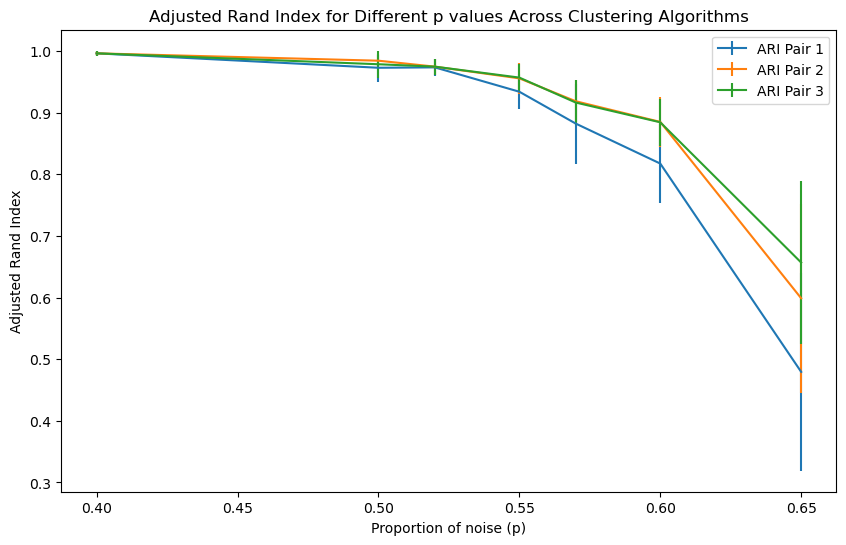

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import adjusted_rand_score
from rac.correlation_clustering import max_correlation, fast_max_correlation, max_correlation_dynamic_K

def create_similarity_matrix(y, r, p):
    n = len(y)
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            if i == j:
                S[i, j] = 0
            else:
                S[i, j] = S[j, i] = 1 if y[i] == y[j] else -1
    
    upper_indices = np.triu_indices(n, k=1)
    num_upper_elements = len(upper_indices[0])
    
    # Apply r proportion of zeros
    mask_zero = np.random.choice(range(num_upper_elements), size=int(r*num_upper_elements), replace=False)
    S[upper_indices[0][mask_zero], upper_indices[1][mask_zero]] = 0
    S[upper_indices[1][mask_zero], upper_indices[0][mask_zero]] = 0

    # Apply p proportion of noisy elements to the remaining
    remaining_indices = np.setdiff1d(range(num_upper_elements), mask_zero)
    mask_random = np.random.choice(remaining_indices, size=int(p*len(remaining_indices)), replace=False)
    random_values = 2 * np.random.rand(len(mask_random)) - 1
    S[upper_indices[0][mask_random], upper_indices[1][mask_random]] = random_values
    S[upper_indices[1][mask_random], upper_indices[0][mask_random]] = random_values
    
    return S

def run_experiment(K, r, p_values, seeds):
    X, y = make_classification(n_samples=300, n_classes=K, n_features=10, n_informative=10, n_redundant=0, n_clusters_per_class=1, random_state=42)
    results = np.zeros((len(p_values), len(seeds), 3))  # Storage for ARIs

    for i, p in enumerate(p_values):
        for j, seed in enumerate(seeds):
            np.random.seed(seed)
            S = create_similarity_matrix(y, r, p)
            solution, _ = max_correlation_dynamic_K(S, K, 5)
            K_solution = len(np.unique(solution))
            solution2, _, _ = mean_field_clustering(S, K_solution, solution, cus=False, ns=1, iter=50)
            solution3, _, _ = mean_field_clustering(S, K_solution, solution, cus=False, ns=1, iter=200)

            results[i, j, 0] = adjusted_rand_score(y, solution)
            results[i, j, 1] = adjusted_rand_score(y, solution2)
            results[i, j, 2] = adjusted_rand_score(y, solution3)

    return results

def plot_results(p_values, results):
    mean_results = np.mean(results, axis=1)
    std_results = np.std(results, axis=1)

    plt.figure(figsize=(10, 6))
    for i in range(results.shape[2]):
        plt.errorbar(p_values, mean_results[:, i], yerr=std_results[:, i], label=f'ARI Pair {i+1}')
    
    plt.xlabel('Proportion of noise (p)')
    plt.ylabel('Adjusted Rand Index')
    plt.title('Adjusted Rand Index for Different p values Across Clustering Algorithms')
    plt.legend()
    plt.show()

# Experiment settings
K = 5
r = 0.8
p_values = [0.4, 0.5, 0.52, 0.55, 0.57, 0.6, 0.65]
seeds = [42, 43, 44, 45, 46, 47, 58]

results = run_experiment(K, r, p_values, seeds)
plot_results(p_values, results)
